**TRABALHO PRATICO 3** 

**Franci Rrapi (UFMG - 2021/1)**

**IMPLEMENTATION and TESTS**

Below is the implementation of this algorithm and you can find also the image tests made (they are also saved and available in the same folder of the notebook)

In [1]:
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

import time

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
# %matplotlib notebook

In [143]:
def Rz(theta):
  
    return np.array([[  np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta),  np.cos(theta), 0 ],
                      [ 0            ,  0            , 1 ]])

def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  

def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


In [9]:
# Retorna um vetor com duas colunas: [angulo, dist]
def format_laser_data(range_data, scan_range, step_size, max_sensor_range=5):

    laser_data = []

    range_data = np.asarray(range_data)
    pts = math.floor(scan_range/step_size)
    
    # Rotacionando 90 graus
    angle =- scan_range*0.5
    for i in range(pts):
        
        dist = range_data[i]        
        if dist <= 0:
             dist = max_sensor_range
        
        laser_data.append([angle, dist])
            
        angle=angle+step_size
        
    return np.array(laser_data)
    

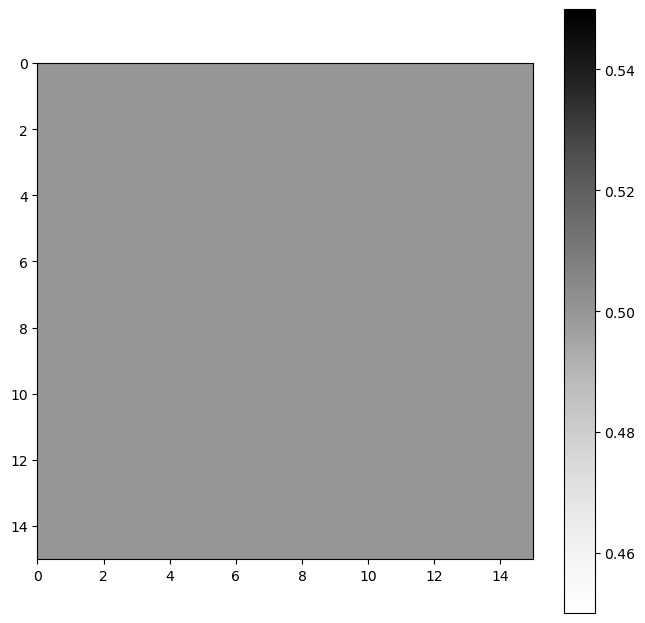

In [138]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

map_size = np.array([30, 30])
cell_size = 2

rows, cols = (map_size/cell_size).astype(int)

# m = np.random.uniform(low=0.0, high=1.0, size=(rows, cols))
m = np.full((rows, cols), 0.5)

plt.imshow(m, cmap='Greys', origin='upper', extent=(0, cols, rows, 0))

ax.set_xticks(np.arange(0, cols, cell_size))
ax.set_yticks(np.arange(0, rows, cell_size))

plt.colorbar()

[2 3 3 4 4 5]
[2 3 4 5 6 7]


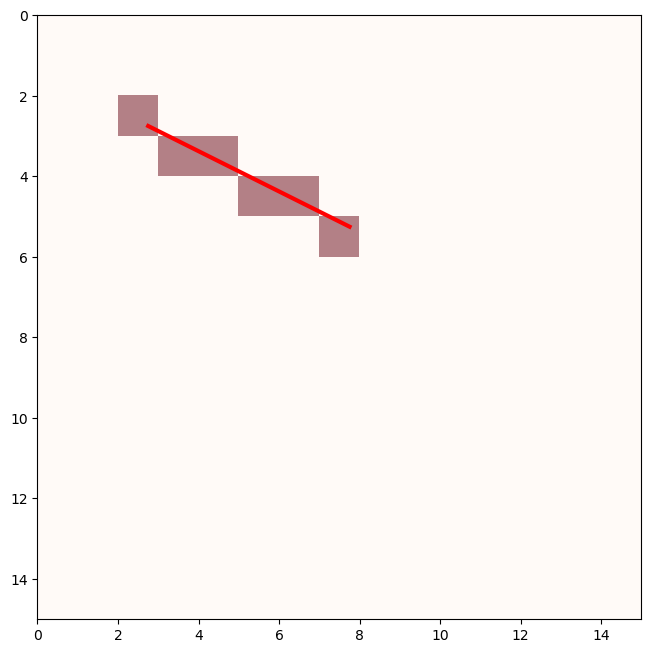

In [141]:
from skimage.draw import line

x, y = 5.5, 5.5
xo, yo = 15.5, 10.5

# x: column, y: row
xi, yi = np.floor((1/cell_size)*np.array([x, y])).astype(int)
xoi, yoi = np.floor((1/cell_size)*np.array([xo, yo])).astype(int)


line_bresenham = np.zeros((rows, cols), dtype=np.uint8)
rr, cc = line(yi, xi, yoi, xoi) # r0, c0, r1, c1
print(rr)
print(cc)
line_bresenham[rr, cc] = 1

fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.imshow(m, cmap='Greys', extent=(0, cols, rows, 0))
ax.imshow(line_bresenham, cmap='Reds', extent=(0, cols, rows, 0), alpha=.5)

ax.set_xticks(np.arange(0, cols, cell_size))
ax.set_yticks(np.arange(0, rows, cell_size))

ax.plot([x/cell_size, xo/cell_size], [y/cell_size, yo/cell_size], 'r-', linewidth=3)

In [113]:
import sys
math.log(sys.float_info.min)

# inverse range sensor model function useful for the occupancy grid algorithm
# return a value that is 0.6 if cell occupied, 0.3 if cell is free, and 0.5 otherwise
def inverse_sensor_model(mi, xt, zt):
    xi, yi = mi[0], mi[1]
    x, y = xt[0], xt[1]
    
    r = math.sqrt((xi - x)**2 + (yi - y)**2)
    
    if r >= 0 and r <= zt - 0.1:
        return 0.3
    elif r >= zt - 0.1 and r <= zt + 0.1:
        return 0.6
    else:
        return 0.5

In [153]:
####################################################################################
#                                                                                  #
#                 LEMBRE-SE QUE A SIMULAÇÃO DEVE ESTAR EM EXECUÇÃO!                #
#                                                                                  #
####################################################################################

# Normalize angle to the range [-pi,pi)
def normalizeAngle(angle):
    return np.mod(angle+np.pi, 2*np.pi) - np.pi

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')

    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait) 
    returnCode, refHandle = sim.simxGetObjectHandle(clientID, "ReferenceFrame0", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle1 = sim.simxGetObjectHandle(clientID, "Goal1", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle2 = sim.simxGetObjectHandle(clientID, "Goal2", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle3 = sim.simxGetObjectHandle(clientID, "Goal3", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle4 = sim.simxGetObjectHandle(clientID, "Goal4", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle5 = sim.simxGetObjectHandle(clientID, "Goal5", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle6 = sim.simxGetObjectHandle(clientID, "Goal6", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle7 = sim.simxGetObjectHandle(clientID, "Goal7", sim.simx_opmode_oneshot_wait)

    goal_handles = [goalHandle1, goalHandle2, goalHandle3, goalHandle4, goalHandle5, goalHandle6, goalHandle7]
                 
                 
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)

    # Handle para os dados do LASER
    laser_data_name = "hokuyo_range_data"
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)

    
    goals = []
    for goalHandle in goal_handles:
        returnCode, pos = sim.simxGetObjectPosition(clientID, goalHandle, refHandle, sim.simx_opmode_oneshot_wait)
        returnCode, ori = sim.simxGetObjectOrientation(clientID, goalHandle, refHandle, sim.simx_opmode_oneshot_wait)
#         goal_angle = np.arctan2(pos[1]-qstart[1], pos[0] - qstart[0])
#         qgoal = np.array([pos[0], pos[1], goal_angle])
        qgoal = np.array([pos[0], pos[1]])
        goals.append(qgoal)
        
    # rrt algorithm useful parameters
    obstacles = [ # circles parametrized by [x, y, radius]
                np.asarray(p1),
                np.asarray(p2),
                np.asarray(p3),
                np.asarray(p4)
        ] 
    for o in obstacles:
        o[2] = o[2] + 0.5
    bounds = np.array([0, 30]) # Bounds in both x and y
    
    # map grid initialization
    map_size = np.array([30, 30])
#     cell_size = 1
    cell_size = 2
    rows, cols = (map_size/cell_size).astype(int)
    m = np.full((rows, cols), 0.5)
    
    # laser scan parameters
    scan_range = 180*np.pi/180
    step_size = 2*np.pi/1024
    max_sensor_range=7
    
    aux = np.array([0, 0, 0, 1])
   
    # Específico do robô
    # https://www.generationrobots.com/media/Pioneer3DX-P3DX-RevA.pdf
    L = 0.381
    r = 0.0975
    maxv = 1.0
    maxw = np.deg2rad(45)
    
    path = []


    for g in goals:
#         print("1")
        
        returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
        returnCode, ori = sim.simxGetObjectOrientation(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
        qstart = np.array([pos[0], pos[1], ori[2]])

        start = np.array([qstart[0], qstart[1]]) # Start location
        goal = np.array([g[0], g[1]]) # Goal location

        print("START: {}".format(start))
        print("GOAL: {}".format(goal))
        
        goal_angle = np.arctan2(goal[1]-qstart[1], goal[0] - qstart[0])
        qgoal = np.array([goal[0], goal[1], goal_angle])

        
        # Lembrar de habilitar o 'Real-time mode'
        startTime=time.time()
        lastTime = startTime

        limit = 100
        t = 0
            
        rho = np.inf
        while t < limit and rho > .5 :
#                 print("3")

            now = time.time()
            dt = now - lastTime 

            returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
            returnCode, ori = sim.simxGetObjectOrientation(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
            robotConfig = np.array([pos[0], pos[1], ori[2]])

            path.append(robotConfig[:2])

            dx, dy, dth = qgoal - robotConfig

            rho = np.sqrt(dx**2 + dy**2)


            # Prosseguindo com as leituras
            returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_oneshot_wait)
            raw_range_data = sim.simxUnpackFloats(string_range_data)
            laser_data = format_laser_data(raw_range_data, scan_range, step_size)

            # Defining Homogeneous Transformation from robot to reference frame
            pa_borg = np.array(pos)
            alpha, beta, gamma = ori
            Rab = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
            Tw_r = np.column_stack((Rab, pa_borg))
            Tw_r = np.row_stack((Tw_r, aux))


            xt = [int(np.ceil(robotConfig[0])),int(np.ceil(robotConfig[1]))]
            xtg = [int(np.ceil(robotConfig[0])/cell_size),int(np.ceil(robotConfig[1])/cell_size)]
            m[xtg[0],xtg[1]] = 0 # set the robot position grid as empty
            theta = robotConfig[2]
            
            # laser data processing and occupancy grid map construction
            for j in range(len(laser_data)):
                ang, dist = laser_data[j]
                if dist < max_sensor_range:
#                         print("4")
                    x = dist * np.cos(theta + ang)
                    y = -dist * np.sin(theta + ang)
                    obs_r = np.array([x, y, 0, 1])
            
                    # obstacle detected by laser wrt to the reference global frame
                    obs_w = Tw_r @ obs_r

                    rtli = [int(obs_w[0]), int(obs_w[1])]
#                     

                    # x: column, y: row
                    xi, yi = np.floor((1/cell_size)*np.array(xt)).astype(int)
                    xoi, yoi = np.floor((1/cell_size)*np.array(rtli)).astype(int)
            
                    # bresenham line creation
                    rr, cc = line(yi, xi, yoi, xoi) # r0, c0, r1, c1
                    
                    # cells that the bresenham line intersects
                    cell_path = []
                    for k in range(len(rr)):
                        xx = rr[k]
                        yy = cc[k]
                        cell_path.append([xx, yy])
                        
                    print(cell_path)
                    
                    # occupancy grid algorithm that updates each cell probability
                    for index in cell_path:
                        ii = index[0]
                        jj = index[1]
                        pmi = inverse_sensor_model(index, xtg, dist)
#                             lti = math.log(m[i][j]/(1-m[i][j])) + math.log(pmi/(1-pmi))
                        lti = math.log(pmi/(1-pmi))
                        pli = 1 - 1/(1 + math.exp(lti))
                        m[ii][jj] = m[ii][jj] + pli


            kr = 1
            kt = 2

            v = kr*(dx*np.cos(robotConfig[2]) + dy*np.sin(robotConfig[2]))
            w = kt*(np.arctan2(dy,dx) - robotConfig[2])


            # Limit v,w to +/- max
            v = max(min(v, maxv), -maxv)
            w = max(min(w, maxw), -maxw)  



            wr = ((2.0*v) + (w*L))/(2.0*r)
            wl = ((2.0*v) - (w*L))/(2.0*r)


            # Enviando velocidades
            sim.simxSetJointTargetVelocity(clientID, r_wheel, wr, sim.simx_opmode_oneshot_wait)
            sim.simxSetJointTargetVelocity(clientID, l_wheel, wl, sim.simx_opmode_oneshot_wait)

            t = t + dt  
            lastTime = now

    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)

    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         

    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

Program started
Connected to remote API server
START: [4.55557156 6.49958611]
GOAL: [ 6.05000019 14.10000134]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2],

[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[

[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [3, 3], [2, 4], [2, 5]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[[3, 2], [2, 3], [2, 4]]
[

[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]
[[3, 2], [3, 3], [3, 4]]


[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]
[[3, 2], [4, 3], [4, 4]]


[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]


[[4, 2], [5, 3], [5, 4]]
[[4, 2], [5, 3], [5, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]
[[4, 2], [4, 3], [4, 4]]


[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4], [3, 5]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3

[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4], [4, 5]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 

[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 3

[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 4]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3]]
[[4, 3], [3, 3

[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3], [3, 3]]
[[

[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3], [4, 4]]
[[4, 3], [4, 4]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]
[[4, 3]]

[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3

[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[

[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4

[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 3]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4,

[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5, 3], [4, 4]]
[[5,

[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5, 3], [5, 4]]
[[5,

[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 3]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4

[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3]

[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5

[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [6, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]]
[[6, 3], [5, 4], [5, 5]

[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 3], [4, 2], [3, 2]]
[[6, 3], [5, 2], [4, 2], [3, 1]]
[[6, 3], [5, 2], [4, 2], [3, 1]]
[[6, 3], [5, 2], [4, 2], [3, 1]]
[[6, 3], [

[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [5, 2], [5, 1], [4, 0]]
[[6, 3], [

[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]
[[6, 3], [6, 4], [6, 5]]


[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


START: [ 6.01687527 13.88298607]
GOAL: [ 6.52500153 22.94999504]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [

[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [7, 4], [7, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]
[[7, 3], [6, 4], [6, 5]]


[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]


[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]


[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]


[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]


[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]


[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]
[[8, 3], [7, 4], [7, 5]]


[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]
[[8, 3], [8, 4], [8, 5]]


[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4

[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4], [8, 5]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]

[[9, 3], [9, 4], [9, 5]]
[[9, 3], [9, 4], [9, 5]]
[[9, 3], [9, 4], [9, 5]]
[[9, 3], [9, 4], [9, 5]]
[[9, 3], [9, 4], [9, 5]]
[[9, 3], [9, 4], [9, 5]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]


[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4

[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4]]
[[9, 3], [8, 4

[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3], [9, 4]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3]]
[[9, 3], 

[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], 

[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], 

[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], 

[[10, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]


[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 3]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]


[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3]]
[[10, 3]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3], [9, 4]]
[[10, 3]

[[10, 3]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3], [10, 4]]
[[10, 3

[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [1

[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11,

[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], 

[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [11, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 

[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [

[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [10, 5]]
[[11, 3], [10, 4], [

START: [ 6.51987743 22.7482338 ]
GOAL: [16.20000076 22.42499733]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [

[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [11, 5]]
[[11, 3], [11, 4], [

[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [11, 4]]
[[12, 3], [11, 4]]
[[12, 3], [11, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]]
[[12, 3], [11, 4], [11, 5]

[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 4], [12, 5]]
[[12, 3], [12, 

[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [1

[[12, 3], [13, 4]]
[[12, 3], [13, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [13, 4]]
[[12, 3], [13, 4]]
[[12, 3], [13, 4]]
[[12, 3], [13, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [12, 4]]
[[12, 3], [1

[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]

[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 3]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12, 4], [13, 4]]
[[12,

[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [

[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3], [14, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]

[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [13, 3]]
[[12, 4], [12, 3]]
[[12, 4], [12, 3]]
[[12, 4], [12, 3]]
[[12, 4], [12, 3]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]

[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]


[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]
[[12, 4]]


[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [1

[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [1

[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[

[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5], [12, 4]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12

[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]


[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5], 

[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5], [13, 6]]
[[12, 5]

[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [1

[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [13, 6], [14, 6]]
[[1

[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]


[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [12, 5]]
[[12, 6], [13, 5]]
[[12, 6], [13, 5], [14, 5]]
[[12, 6], [13, 5], [14, 5]]
[[12, 6], [13, 5], [14, 5]]
[[12, 6], [13, 5], [14, 5]]
[[12, 6], [13, 5], [14, 5]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6], [14, 6]]
[[12, 6], [13, 6]]
[[12, 6], [13, 

[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 5], [13, 5]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [

[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [13, 6]]
[[11, 6], [12, 6], [

[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [10, 8]]
[[11, 6], [10, 7], [

[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [

[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [

[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [

[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [

[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 6], [13, 6]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [

[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [13, 7]]
[[11, 7], [12, 7], [

[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [

[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [

[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[[11, 8], [10, 9], [9, 9]]
[

[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [

START: [16.03330231 22.44118881]
GOAL: [23.6000042  14.62499809]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [

[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 9], [8, 9]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [9, 8], [8, 8]]
[[11, 8], [10, 8], [

[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [

[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [13, 8]]
[[11, 8], [12, 8], [

[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [13, 7]]
[[11, 8], [12, 7], [

[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11, 9], [12, 8], [13, 7]]
[[11

[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[

[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[

[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [11, 8], [12, 7], [12, 6]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 

[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [

[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [12, 7]]
[[11, 9], [12, 8], [

[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [

[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [

[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [

[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [11, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [12, 7]]
[[10, 9], [11, 8], [

[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [

[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9],

[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [1

[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [10, 9], [11, 8], [11, 7]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9]

[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11, 9], [11, 8]]
[[10, 10], [11

[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [

[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [

[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [

[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [11, 8]]
[[9, 10], [10, 9], [

[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [

[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9], [10, 8]]
[[9, 10], [10, 9]]
[[9, 10], [10, 9]]
[[9, 10], [10, 9]]
[[9, 10], [10, 9]]


[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[

[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 

[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [9, 10], [10, 9], [10, 8]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]
[[9, 11], [10, 10], [10, 9]]


[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [

[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]

[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11],

[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10]

[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [10, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]

[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]


[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10], [9, 9]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9, 10]]
[[8, 11], [9

[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [8, 11], [9, 10], [9, 9]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9, 11], [9, 10]]
[[8, 12], [9

[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [9, 10]]
[[7, 12], [8, 11], [

START: [23.4289341  14.81847382]
GOAL: [24.49999237  8.05000305]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [

[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [

[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [

[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [8, 10]]
[[7, 12], [8, 11], [

[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [8, 10], [8, 9]]
[[7, 12], [7, 11], [8, 10], [8, 9]]
[[7, 12], [7, 11], [8, 10], 

[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], [7, 9]]
[[7, 12], [7, 11], [7, 10], 

[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], 

[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], [6, 9]]
[[7, 12], [7, 11], [6, 10], 

[[6, 12], [6, 11], [6, 10], [6, 9]]
[[6, 12], [6, 11], [6, 10], [6, 9]]
[[6, 12], [6, 11], [6, 10], [6, 9]]
[[6, 12], [6, 11], [6, 10], [6, 9]]
[[6, 12], [6, 11], [6, 10], [6, 9]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12]

[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [

[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [

[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [

[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11]]
[[6, 12], [6, 11]]
[[6, 12], 

[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11], [6, 10]]
[[6, 12], [6, 11]]
[[6, 12], [6, 11]]
[[6, 12], [6, 11]]
[[6,

[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11], [5, 10]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 12], [5, 11]]
[[6, 1

[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5

[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5,

[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 1

[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5,

[[5, 12], [4, 11]]
[[5, 12], [4, 11]]
[[5, 12], [4, 11]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], 

[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [4, 11], [4, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [5, 10]]
[[5, 12], [5, 11], [

[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4,

[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 9]]
[[4, 12], [4, 11], [5, 10], [5, 

[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [

START: [24.47870255  8.19443417]
GOAL: [16.375       5.52500153]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 1

[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], 

[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], 

[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], [4, 9]]
[[4, 12], [4, 11], [4, 10], 

[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4, 12], [4, 11], [3, 10], [3, 9]]
[[4,

[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [2, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [3, 10]]
[[4, 12], [3, 11], [

[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [

[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [2, 10]]
[[3, 12], [2, 11], [

[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 11], [0, 10]]
[[3, 12], [2, 11], [1, 10]]
[[3, 12], 

[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[

[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[[3, 12], [2, 12], [1, 11], [0, 11]]
[

[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[

[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[[3, 11], [2, 11], [1, 11], [0, 11]]
[

[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]
[[3, 11], [2, 11], [1, 12], [0, 12]]

[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [

[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [2, 13]]
[[3, 11], [2, 12], [1, 13]]
[[3, 11], [2, 12], [1, 13]]
[[3, 11], [2, 12], [1, 13]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [1, 12]]
[[3, 11], [2, 12], [

[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [2, 13]]
[[4, 11], [3, 12], [

[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [3, 13]]
[[4, 11], [3, 12], [

[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [

[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12], [5, 13]]
[[4, 11], [5, 12], [5, 13]]
[[4, 11], [5, 12], [5, 13]]
[[4, 11], [5, 12], [5, 13]]
[[4, 11], [5, 12], [5, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13]]
[[4, 11], [4, 12], [4, 13

[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5

[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5

[[4, 11], [5, 11], [6, 11]]
[[4, 11], [5, 11], [6, 11]]
[[4, 11], [5, 11], [6, 11]]
[[4, 11], [5, 11], [6, 11]]
[[4, 11], [5, 11], [6, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 11]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 11], [5, 12]]
[[4, 

[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 11], [6, 11]]
[[4, 10], [5, 11], [6, 11]]
[[4, 10], [5, 11], [

[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [6, 10]]
[[4, 10], [5, 10], [

[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], [6, 9]]
[[4, 10], [5, 9], 

[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4,

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[

[[4, 10], [4, 9], [4, 8]]
[[4, 10], [4, 9], [4, 8]]
[[4, 10], [4, 9], [4, 8]]
[[4, 10], [4, 9], [4, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5

[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4, 9], [5, 8]]
[[3, 10], [4

[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5

[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5

[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5, 9], [5, 8]]
[[4, 10], [5

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 9], [5, 8], [5, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 

[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [3, 8], [3, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 9], [4, 8], [4, 7]]
[[4, 10], [4, 

[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 9], [3, 8], [3, 7]]
[[3, 10], [3, 

[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 9], [2, 8], [2, 7]]
[[3, 10], [3, 

[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 

[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [1, 8]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 9], [2, 8], [1, 7]]
[[3, 10], [2, 

[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [

[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8

[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 9], [1, 9]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 8], [1, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]

[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [

[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [

[[3, 9], [2, 9], [1, 8], [0, 8]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [

[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [2, 8], [1, 8], [0, 7]]
[[3, 9], [

[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [

[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [

START: [16.51536179  5.55016136]
GOAL: [14.32499886 16.00000191]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2

[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [

[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 8], [1, 7], [0, 7]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [

[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [

[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 7], [0, 6]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [1, 6], [0, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [

[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [

[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [

[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [2, 7], [2, 6], [1, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [

[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [2, 6], [2, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [

[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [3, 6], [3, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [

[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [3, 7], [4, 6], [4, 5]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 8], [4, 7], [4, 6]]
[[3, 

[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]


[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7], [5, 6]]
[[4, 8], [5, 7]]
[[4, 8], [5, 7]]
[[4, 8], [5, 7]]
[[4, 8], [5, 7]]
[[4, 8], [5, 7]]
[[4, 8], [5, 7]]
[[4, 8], [5, 7]]
[[4, 8

[[4, 8], [5, 7], [6, 6]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]


[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]


[[4, 8], [5, 7], [6, 7]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]
[[4, 8], [5, 8], [6, 8]]


[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5,

[[4, 7], [5, 8]]
[[4, 7], [5, 8]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8],

[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [5, 8], [5, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]


[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]


[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]


[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]


[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [4, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9

[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 8]]
[[4, 8], [3, 8]]
[[4, 8], [3, 8]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9]]
[[4, 8], [3, 9

[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7

[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [4, 8], [4, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8], [3, 9]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4, 7], [3, 8]]
[[4,

[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 

[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8], [4, 

[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5,

[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]

[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]


[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]


[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [5, 8], [5, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]
[[5, 7], [4, 8], [4, 9]]


[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [4, 9]]
[[6, 7], [5, 8], [4, 9]]
[[6, 7], [5, 8], [4, 9]]
[[6, 7], [5, 8], [4, 9]]
[[6, 7], [5, 8], [4, 9]]


[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]


[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]


[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]


[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]


[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]


[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [6, 8], [6, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]
[[6, 7], [5, 8], [5, 9]]


[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [5, 9]]
[[7, 7], [6, 8], [5, 9]]
[[7, 7], [6, 8], [5, 9]]
[[7, 7], [6, 8], [5, 9]]
[[7, 7], [6, 8], [5, 9]]
[[7, 7], [6, 8], [5, 9]]


[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]


[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]


[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]


[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]


[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [7, 8], [7, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]
[[7, 7], [6, 8], [6, 9]]


[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]


[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [6, 9]]
[[8, 7], [7, 8], [6, 9]]


[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]
[[8, 7], [7, 8], [7, 9]]


Program ended


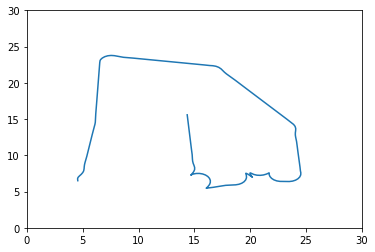

In [154]:
# print(path)
x_val = [x[0] for x in path]
y_val = [x[1] for x in path]

plt.plot(x_val,y_val)
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

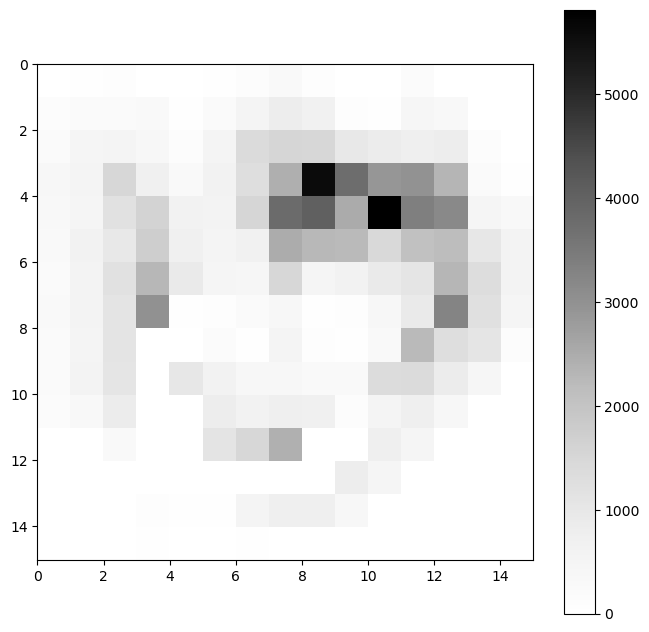

In [155]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

plt.imshow(m, cmap='Greys', origin='upper', extent=(0, cols, rows, 0))

ax.set_xticks(np.arange(0, cols, cell_size))
ax.set_yticks(np.arange(0, rows, cell_size))

plt.colorbar()

In [156]:
import cv2
cv2.imwrite("results/map6_2.pgm", m)

True